In [5]:
import sys
import pandas as pd

In [6]:
"""
Create DataFrame df
"""
dictionary = {
    'int': [1, 2, 3],
    'float': [4.0, 5.0, 6.0],
    'str': ['a', 'b', 'c'],
    'bool': [True, False, True],
    'datetime': [pd.Timestamp('20190510'), pd.Timestamp('20190511'), pd.Timestamp('20190512')],
    'timedelta': [pd.Timedelta(days=1), pd.Timedelta(days=2), pd.Timedelta(days=3)],
    'category': pd.Series([0, 1, 4], dtype="category")
}
df = pd.DataFrame(dictionary)

### 1. What is dtype?
   * Each column in a DataFrame has a specific type, denoted as the 'dtype'.

In [7]:
"""
Display the dtypes of df
"""
df.dtypes

int                    int64
float                float64
str                   object
bool                    bool
datetime      datetime64[ns]
timedelta    timedelta64[ns]
category            category
dtype: object

* The relationship between pandas dtype and other data types are shown in the following diagram:

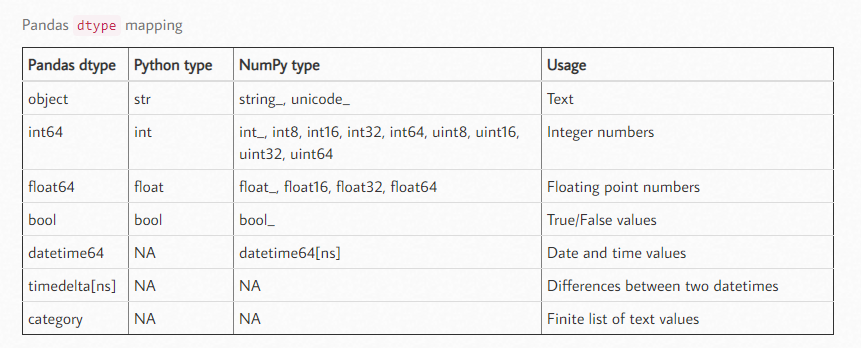

In [18]:
"""
Display the diagram
"""
from IPython.display import Image
Image("pandas_dtype_mapping.PNG")

* Columns with different dtypes consume different amounts of memory

In [9]:
"""
Display the memory usage of each column of df
"""
for column_name in df.columns:
    print(f"Memory usage of column {column_name} is {df[column_name].memory_usage(deep=True)} bytes")

Memory usage of column int is 104 bytes
Memory usage of column float is 104 bytes
Memory usage of column str is 266 bytes
Memory usage of column bool is 83 bytes
Memory usage of column datetime is 104 bytes
Memory usage of column timedelta is 104 bytes
Memory usage of column category is 187 bytes


### 2. How to detect dtype?

In [57]:
"""
Detect df's dtypes
"""


from pandas.api.types import is_datetime64_ns_dtype, is_timedelta64_ns_dtype, is_categorical_dtype
from pandas.core.dtypes.common import is_bool_dtype, is_integer_dtype, is_float_dtype, is_string_dtype


dtype_detect_dict = {
    'int': is_integer_dtype,
    'float': is_float_dtype,
    'str': is_string_dtype,
    'bool': is_bool_dtype,
    'datetime': is_datetime64_ns_dtype,
    'timedelta': is_timedelta64_ns_dtype,
    'category': is_categorical_dtype
}
for column_name in df.columns:
    if dtype_detect_dict.get(column_name)(df[column_name]):
        print(f"The dtype of column {column_name} is detected.")

The dtype of column int is detected.
The dtype of column float is detected.
The dtype of column str is detected.
The dtype of column bool is detected.
The dtype of column datetime is detected.
The dtype of column timedelta is detected.
The dtype of column category is detected.


### 3. dtype tricks

* Trick 1: integer column with np.nan will have the dtype of float64

In [11]:
"""
Create a DataFrame with integers and replace one element with np.nan
"""
import numpy as np
df_int = pd.DataFrame({'col0': [1, 2, 3]})
print(f"The dtype of column col0 is {df_int['col0'].dtype}.")
df_int.iloc[0, 0] = np.nan
print(f"With one np.nan element, the dtype of column col0 becomes {df_int['col0'].dtype}.")

The dtype of column col0 is int64.
With one np.nan element, the dtype of column col0 becomes float64.


* Trick 2: a column with mixed data type will have the dtype of object

In [68]:
df_mixed = pd.DataFrame({'col0': [1, 'a', True]})
print(f"The dtype of mixed-data-type column col0 is {df_mixed['col0'].dtype}.")

The dtype of mixed-data-type column col0 is object.
